In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Loading the Excel file
yt_file = "YT-DOC-GLOBAL-VIEW.xlsx"

In [42]:
# Get all sheet names
xls = pd.ExcelFile(yt_file)
print(xls.sheet_names)

['YouTube Viewing Data', 'Video Meta Data', 'Definitions']


In [43]:
# Load different sheets or tables
videos_df = pd.read_excel(yt_file, sheet_name="Video Meta Data")
views_df = pd.read_excel(yt_file, sheet_name="YouTube Viewing Data")

In [44]:
# Display first few rows of the videos
videos_df.head()

,Video ID,Channel Key,Channel Name,Video Title,Published Date,Video Length,URL,Series,Content Format
0,295373,16,Channel 4 Documentaries,The love she has for him is beautiful to see #...,2023-08-24,54,https://www.youtube.com/watch?v=KLjtqDc4wIg,24 HOURS IN A&E XIV,VERTICAL
1,317566,16,Channel 4 Documentaries,Suddenly Losing A Loved One | 999: On The Fron...,2024-01-31,370,https://www.youtube.com/watch?v=JkZeEbE_ggk,999: On the Front Line,MID FORM
2,12745,16,Channel 4 Documentaries,Transitioning from a Man to a Woman at 44 Year...,2018-11-29,263,https://www.youtube.com/watch?v=ClMR4jkIG_o,NaN,MID FORM
3,299377,16,Channel 4 Documentaries,Police catch a wanted man #SkyCoppers #Shorts ...,2023-10-24,58,https://www.youtube.com/watch?v=7Tb--EImxIU,Sky Coppers,VERTICAL
4,309817,16,Channel 4 Documentaries,Detransitioning influencer Oli Londonâ€™s new ...,2023-12-13,57,https://www.youtube.com/watch?v=97f_8E9U8Po,Life Uncovered,VERTICAL


In [45]:
# Display the first few rows of the views
views_df.head()

,YouTube Views,Date of View,Channel Key,Video ID,13-34 Year Old Views
0,0,2024-02-08 00:00:00,16,252663,0
1,0,2024-09-22 00:00:00,16,243030,0
2,0,2024-09-23 00:00:00,16,243030,0
3,0,2024-10-28 00:00:00,16,243030,0
4,0,2024-01-06 00:00:00,16,243030,0


In [46]:
views_df.shape

(314854, 5)

#### Checking data quality

In [47]:
# Checking for missing values
print(videos_df.isnull().sum())

Video ID            0
Channel Key         0
Channel Name        0
Video Title         8
Published Date    425
Video Length        0
URL                 0
Series            361
Content Format      0
dtype: int64


In [48]:
print(views_df.isnull().sum())

YouTube Views           0
Date of View            0
Channel Key             0
Video ID                0
13-34 Year Old Views    0
dtype: int64


In [49]:
# Filling missing values with the earliest available date
videos_df["Published Date"].fillna(videos_df["Published Date"].min(), inplace=True)

In [50]:
# Replace with 'no series'
videos_df["Series"].fillna("No Series", inplace=True)

In [51]:
# Replace with unknown title
videos_df["Video Title"].replace("Story", "Unknown Title", inplace=True)
videos_df["Video Title"].fillna("Unknown Title", inplace=True)

In [52]:
print(videos_df.isnull().sum())

Video ID          0
Channel Key       0
Channel Name      0
Video Title       0
Published Date    0
Video Length      0
URL               0
Series            0
Content Format    0
dtype: int64


In [53]:
# Checking for duplicates
videos_df.duplicated().sum()
views_df.duplicated().sum()

0

In [54]:
# Correct date format
views_df['Date of View'] = pd.to_datetime(views_df['Date of View'], errors='coerce')

In [55]:
# Checking the data types
videos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Video ID        2216 non-null   int64         
 1   Channel Key     2216 non-null   int64         
 2   Channel Name    2216 non-null   object        
 3   Video Title     2216 non-null   object        
 4   Published Date  2216 non-null   datetime64[ns]
 5   Video Length    2216 non-null   int64         
 6   URL             2216 non-null   object        
 7   Series          2216 non-null   object        
 8   Content Format  2216 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 155.9+ KB


In [56]:
views_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314854 entries, 0 to 314853
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   YouTube Views         314854 non-null  int64         
 1   Date of View          314854 non-null  datetime64[ns]
 2   Channel Key           314854 non-null  int64         
 3   Video ID              314854 non-null  int64         
 4   13-34 Year Old Views  314854 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.0 MB


In [57]:
# Summary statistics
videos_df.describe()

,Video ID,Channel Key,Published Date,Video Length
count,2216.000000,2216.0,2216,2.216000e+03
mean,181696.870939,16.0,2020-09-15 11:03:27.942238208,1.709544e+04
min,42.000000,16.0,2013-11-01 00:00:00,0.000000e+00
25%,25649.000000,16.0,2019-05-15 12:00:00,1.617500e+02
50%,241146.500000,16.0,2022-05-03 00:00:00,3.095000e+02
75%,293451.500000,16.0,2023-07-09 06:00:00,6.910000e+02
max,359241.000000,16.0,2024-11-03 00:00:00,1.504398e+07
std,129167.808003,0.0,NaN,3.919321e+05


In [58]:
views_df.describe()

,YouTube Views,Date of View,Channel Key,Video ID,13-34 Year Old Views
count,314854.000000,314854,314854.0,314854.000000,314854.000000
mean,208.751663,2024-04-18 17:40:07.813145344,16.0,195672.126071,40.069331
min,0.000000,1970-01-01 00:00:00.000045292,16.0,96.000000,0.000000
25%,2.000000,2024-03-22 00:00:00,16.0,36084.000000,1.000000
50%,8.000000,2024-06-10 00:00:00,16.0,253035.000000,2.000000
75%,38.000000,2024-08-23 00:00:00,16.0,297834.000000,9.000000
max,184659.000000,2024-11-05 00:00:00,16.0,359241.000000,27896.000000
std,1681.624296,NaN,0.0,124213.901507,312.506371


## Analyses

In [59]:
# Aggregate total views and 13-34 year-old views
total_views = views_df["YouTube Views"].sum()
young_views = views_df["13-34 Year Old Views"].sum()
other_views = total_views - young_views

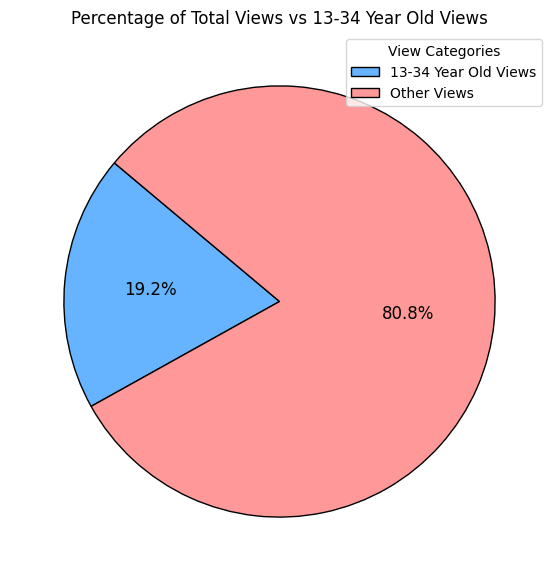

In [63]:
# A pie chart showing the percentage of total views and 13-35 year old views
plt.figure(figsize=(7, 7))
labels = ["13-34 Year Old Views", "Other Views"]
colors = ['#66b3ff', '#ff9999']
wedges, texts, autotexts = plt.pie(
    [young_views, other_views],  
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}, 
    textprops={'fontsize': 12}
)
plt.legend(wedges, labels, title="View Categories", loc="upper right", fontsize=10)
plt.title("Percentage of Total Views vs 13-34 Year Old Views")
plt.show()

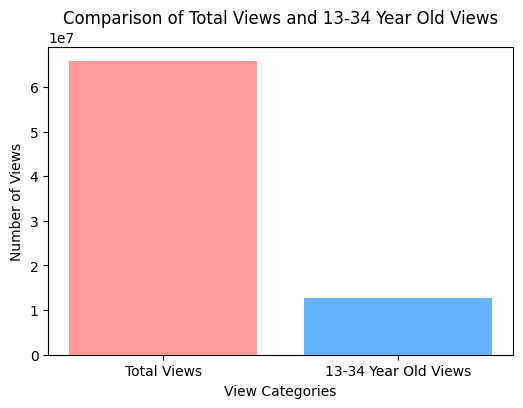

In [64]:
# A bar chart showing total views and 13-35 year old views
plt.figure(figsize=(6, 4))
plt.bar(["Total Views", "13-34 Year Old Views"], [total_views, young_views], color=['#ff9999', '#66b3ff'])
plt.xlabel("View Categories")
plt.ylabel("Number of Views")
plt.title("Comparison of Total Views and 13-34 Year Old Views")
plt.show()

In [65]:
# Merge video metadata with views data on "Video ID"
df_merged = views_df.merge(videos_df[['Video ID', 'Content Format']], on="Video ID", how="left")

In [66]:
# Total YouTube views per content format
views_by_format = df_merged.groupby("Content Format")["YouTube Views"].sum().reset_index()

In [67]:
# Display the result
print(views_by_format)

  Content Format  YouTube Views
0   FULL EPISODE       45308891
1       MID FORM       24318151
2        TRAILER          29069
3       VERTICAL        4617760


In [68]:
# Total 13-34-year-old views per content format
views_by_format_13_34 = df_merged.groupby("Content Format")["13-34 Year Old Views"].sum().reset_index()

In [69]:
print(views_by_format_13_34)

  Content Format  13-34 Year Old Views
0   FULL EPISODE               5560504
1       MID FORM               6652256
2        TRAILER                 13114
3       VERTICAL               2042104


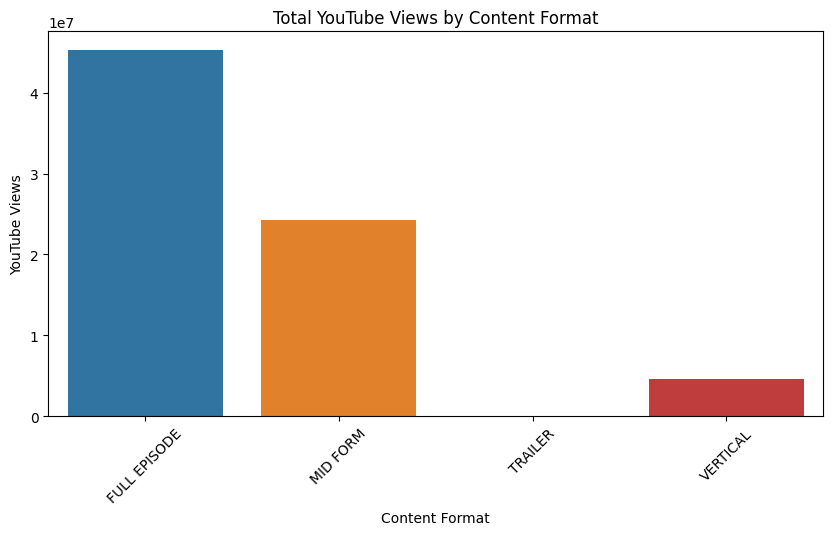

In [70]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Content Format", y="YouTube Views", data=views_by_format)
plt.title("Total YouTube Views by Content Format")
plt.xticks(rotation=45)
plt.show()

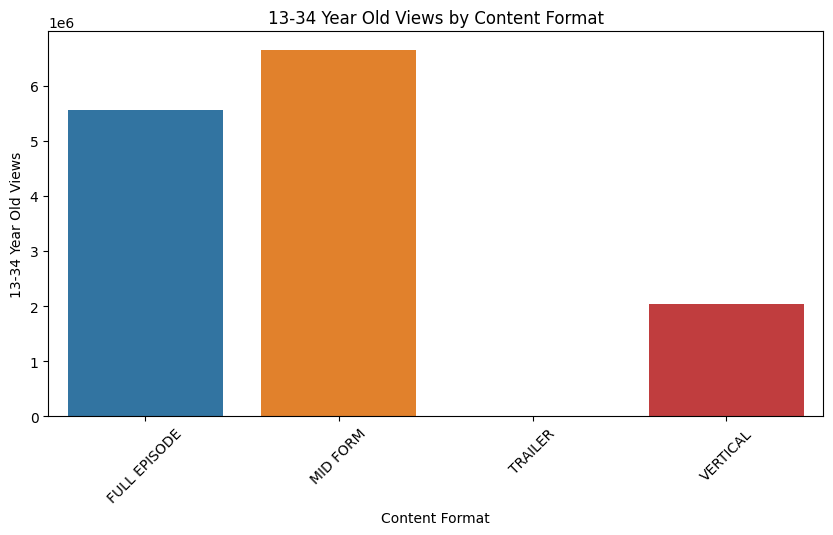

In [71]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Content Format", y="13-34 Year Old Views", data=views_by_format_13_34)
plt.title("13-34 Year Old Views by Content Format")
plt.xticks(rotation=45)
plt.show()

In [72]:
# Merge the two datasets on 'Content Format'
views_combined = views_by_format.merge(views_by_format_13_34, on="Content Format")

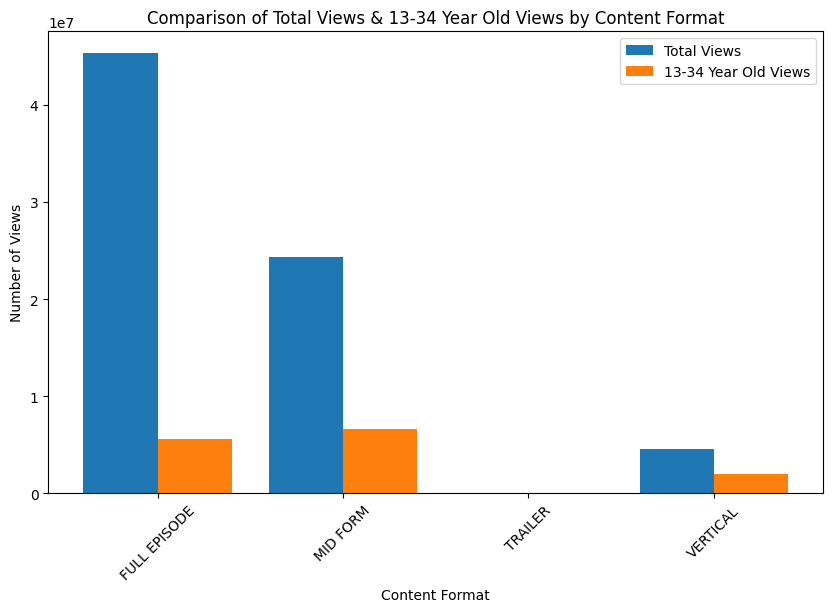

In [73]:
plt.figure(figsize=(10, 6))
bar_width = 0.4
x_labels = views_combined["Content Format"]
x_positions = range(len(x_labels))

plt.bar(x_positions, views_combined["YouTube Views"], width=bar_width, label="Total Views", color='#1f77b4')
plt.bar([x + bar_width for x in x_positions], views_combined["13-34 Year Old Views"], width=bar_width, label="13-34 Year Old Views", color='#ff7f0e')
plt.xlabel("Content Format")
plt.ylabel("Number of Views")
plt.title("Comparison of Total Views & 13-34 Year Old Views by Content Format")
plt.xticks([x + bar_width/2 for x in x_positions], x_labels, rotation=45)
plt.legend()
plt.show()

In [74]:
# Group by Video_ID to get total YouTube views and 13-34 age group views 
video_summary = views_df.groupby('Video ID')[['YouTube Views', '13-34 Year Old Views']].sum().reset_index()

# Merge with videos_df to get video titles
video_summary = video_summary.merge(videos_df[['Video ID', 'Video Title']], on='Video ID', how='left')

# Sort videos by total views
video_summary = video_summary.sort_values(by='YouTube Views', ascending=False)

In [75]:
# Display top 10 performing videos
top_10_videos = video_summary.head(10)
top_10_videos.head(10)

,Video ID,YouTube Views,13-34 Year Old Views,Video Title
563,57603,2658130,715308,I Breastfeed My Boyfriend As Sex Foreplay | Br...
1747,342018,1684170,186157,Britain's Unsolved Crimewave | Dispatches | Ch...
1558,319533,1663098,223633,I Was Kidnapped By My Ex-Boyfriend | The Kidna...
1561,319965,1613807,199323,Inside Britain's Most Troubled Housing Estates...
844,247958,1595123,431891,Struggles Of Having A Penis Larger Than Your F...
1002,265984,1387970,610250,Jamie opens up about her own childhood in Derr...
1643,328724,1148899,127240,Teenager Stabbed In Nottingham Whilst On A Dat...
1644,328724,1148899,127240,Teenager Stabbed In Nottingham Whilst On A Dat...
1652,329862,1108909,125481,13 Year-Old Murdered In Broad Daylight In Read...
1651,329862,1108909,125481,13 Year-Old Murdered In Broad Daylight In Read...


/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/wisdomadike/anaconda3/envs/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


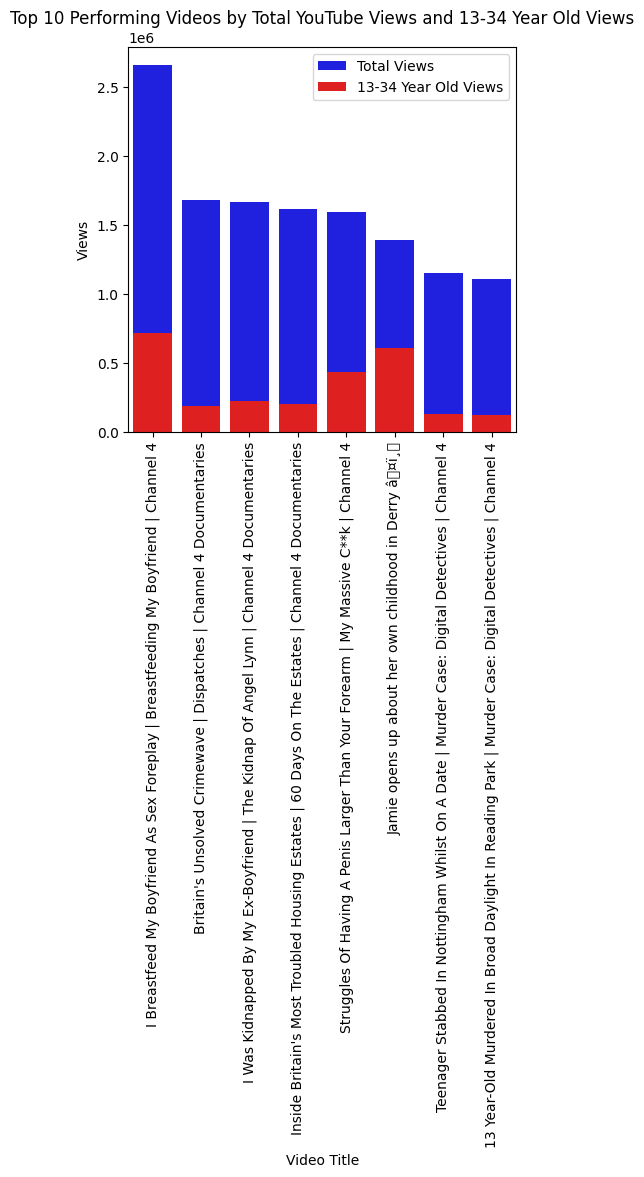

In [76]:
# Set up the matplotlib figure
plt.figure(figsize=(5, 5))

# Create a bar plot for total YouTube views
sns.barplot(x='Video Title', y='YouTube Views', data=top_10_videos, color='b', label='Total Views')

# Create a bar plot for 13-34 Year Old Views
sns.barplot(x='Video Title', y='13-34 Year Old Views', data=top_10_videos, color='r', label='13-34 Year Old Views')

# Add labels and title
plt.xlabel('Video Title')
plt.ylabel('Views')
plt.title('Top 10 Performing Videos by Total YouTube Views and 13-34 Year Old Views')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

#### Content Format Distribution (Top vs. Bottom Videos)

In [77]:
# Top-performing videos (highest views)
top_videos = views_df.nlargest(100, "YouTube Views")

In [78]:
# Bottom-performing videos (lowest views)
bottom_videos = views_df.nsmallest(100, "YouTube Views")

In [79]:
# Combine both into one dataframe with a new column 'Performance'
top_videos["Performance"] = "Top 100"
bottom_videos["Performance"] = "Bottom 100"
combined_videos = pd.concat([top_videos, bottom_videos])

In [80]:
# Merge views_df with videos_df to get 'Content Format'
combined_videos = combined_videos.merge(videos_df[['Video ID', 'Content Format']], on='Video ID', how='left')

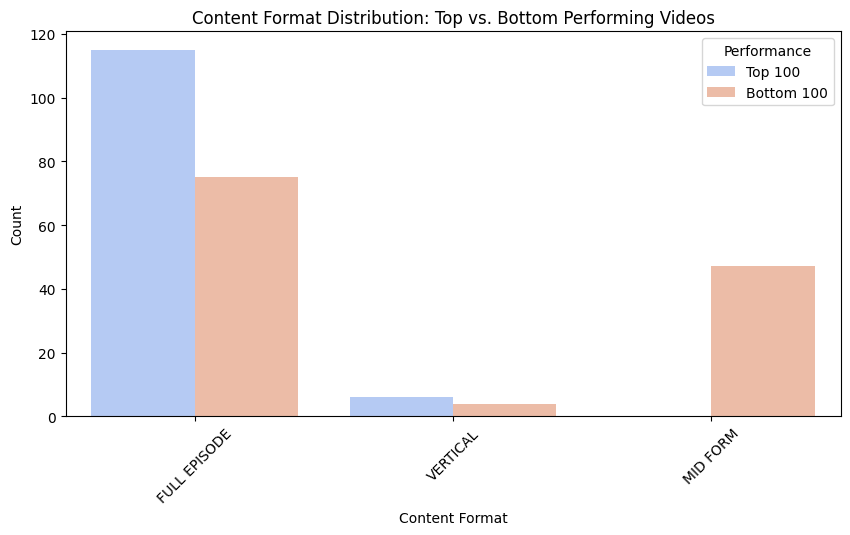

In [81]:
# Plot content format distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_videos, x="Content Format", hue="Performance", palette="coolwarm")
plt.title("Content Format Distribution: Top vs. Bottom Performing Videos")
plt.xlabel("Content Format")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Performance")
plt.show()

#### Video Length Analysis (Top vs. Bottom Videos)

In [82]:
# Merge views_df with videos_df to get 'Video Length'
combined_videos = combined_videos.merge(videos_df[['Video ID', 'Video Length']], on='Video ID', how='left')

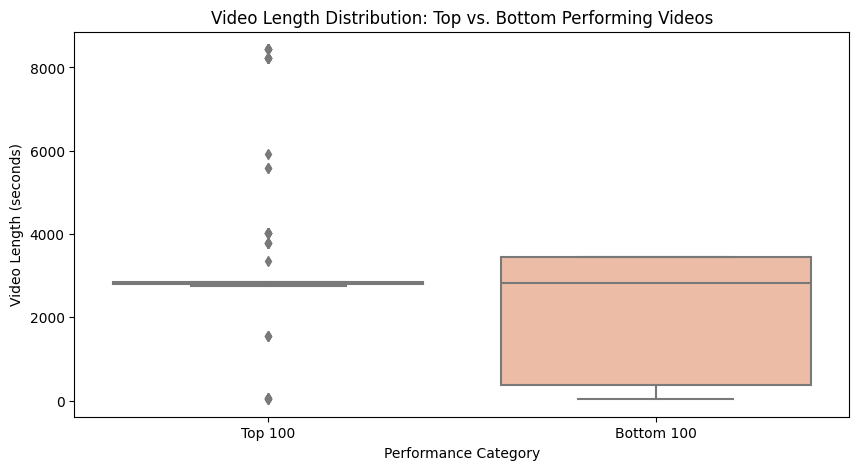

In [83]:
# A box plot to compare video lengths
plt.figure(figsize=(10, 5))
sns.boxplot(data=combined_videos, x="Performance", y="Video Length", palette="coolwarm")
plt.title("Video Length Distribution: Top vs. Bottom Performing Videos")
plt.xlabel("Performance Category")
plt.ylabel("Video Length (seconds)")
plt.show()

#### Series Representation (Top vs. Bottom Videos)

In [84]:
# Merge views_df with videos_df to get 'Series'
combined_videos = combined_videos.merge(videos_df[['Video ID', 'Series']], on='Video ID', how='left')

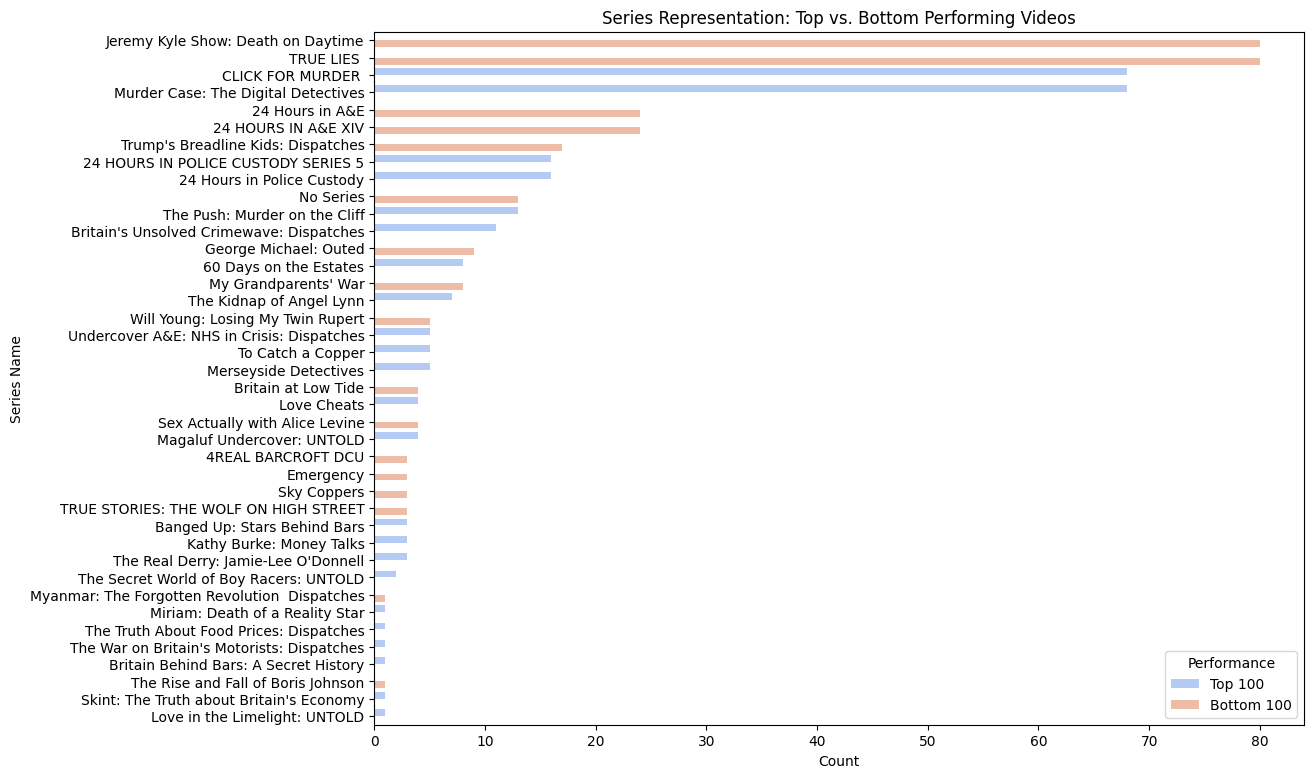

In [85]:
# A bar chart of the most common series in both categories
plt.figure(figsize=(12, 9))
sns.countplot(data=combined_videos, y="Series", hue="Performance", palette="coolwarm", order=combined_videos["Series"].value_counts().index)
plt.title("Series Representation: Top vs. Bottom Performing Videos")
plt.xlabel("Count")
plt.ylabel("Series Name")
plt.legend(title="Performance")
plt.show()

#### Heatmap of Correlations

In [86]:
# Compute the correlation matrix
corr_matrix = combined_videos[["YouTube Views", "Video Length", "13-34 Year Old Views"]].corr()

In [87]:
print(corr_matrix)

                      YouTube Views  Video Length  13-34 Year Old Views
YouTube Views              1.000000      0.199907              0.718307
Video Length               0.199907      1.000000              0.195898
13-34 Year Old Views       0.718307      0.195898              1.000000


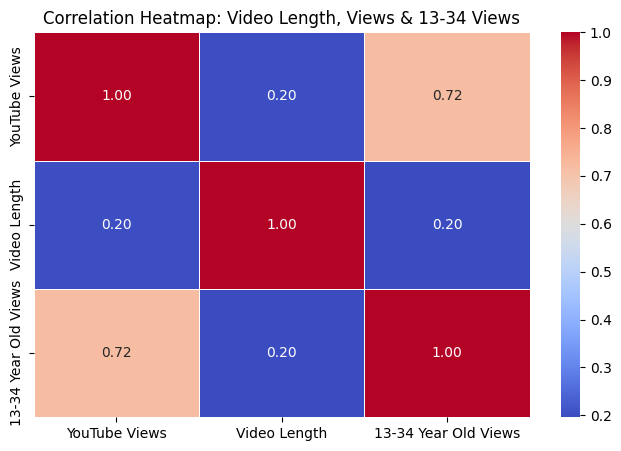

In [88]:
# Generate a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Video Length, Views & 13-34 Views")
plt.show()

### Audience Demographics

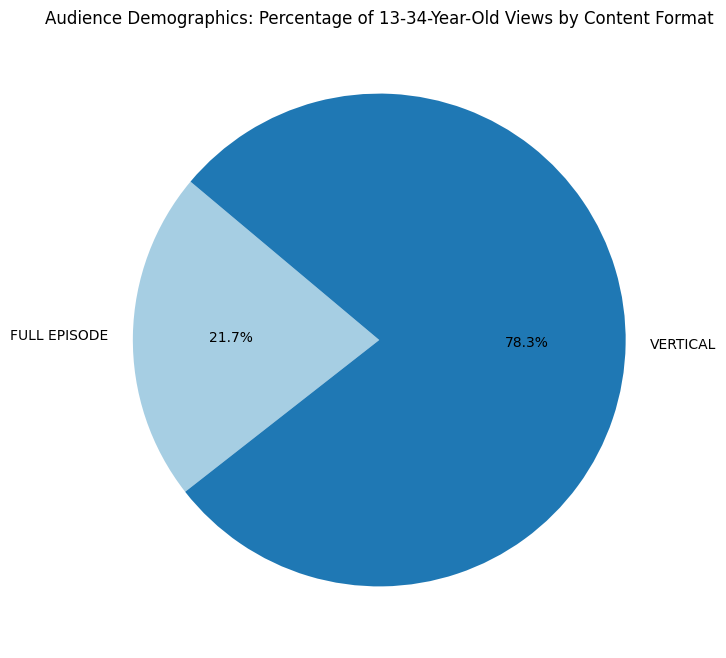

In [89]:
# Calculate the percentage of views from 13-34-year-olds
combined_videos["percentage_13_34"] = (combined_videos["13-34 Year Old Views"] / combined_videos["YouTube Views"]) * 100       

# Group by Content Format and calculate the mean percentage
age_views = combined_videos.groupby("Content Format")["percentage_13_34"].mean().reset_index()

# Drop NaN or infinite values
age_views = age_views.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure there's data to plot
if not age_views.empty:
    # Plot as a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(age_views["percentage_13_34"], labels=age_views["Content Format"], 
            autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title("Audience Demographics: Percentage of 13-34-Year-Old Views by Content Format")
    plt.show()
else:
    print("No valid data available to plot.")

In [90]:
# Calculate the percentage of views from 13-34 year olds
video_summary['Engagement Rate'] = (video_summary['13-34 Year Old Views'] / video_summary['YouTube Views']) * 100

# Define performance threshold (e.g., Top 25% are Overperformers)
threshold = video_summary['YouTube Views'].quantile(0.75)

# Categorize videos based on performance
video_summary['Performance Category'] = video_summary['YouTube Views'].apply(lambda x: 'Overperforming' if x >= threshold else 'Underperforming')

# Display performance breakdown
print(video_summary.groupby('Performance Category').size())

Performance Category
Overperforming      453
Underperforming    1356
dtype: int64


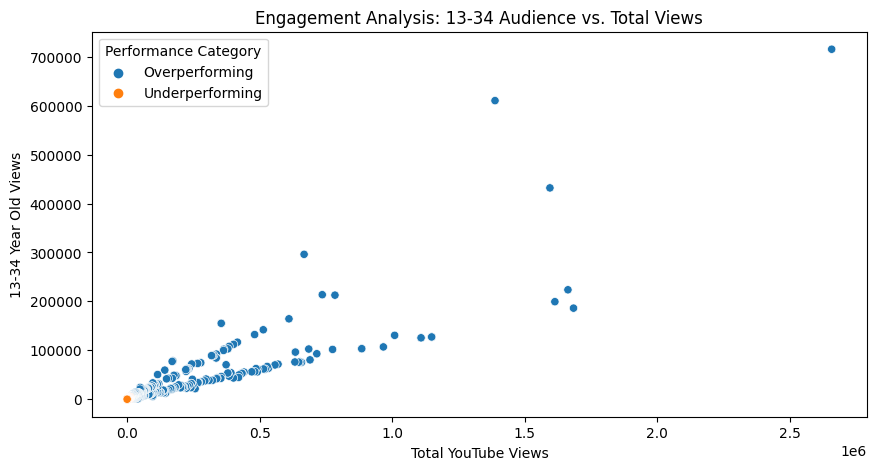

In [91]:
# ##### Audience Engagement Analysis

# Scatter Plot: 13-34 Audience Views vs. Total Views
plt.figure(figsize=(10,5))
sns.scatterplot(data=video_summary, x='YouTube Views', y='13-34 Year Old Views', hue='Performance Category')
plt.title('Engagement Analysis: 13-34 Audience vs. Total Views')
plt.xlabel('Total YouTube Views')
plt.ylabel('13-34 Year Old Views')
plt.legend(title="Performance Category")
plt.show()

#### Trend over time

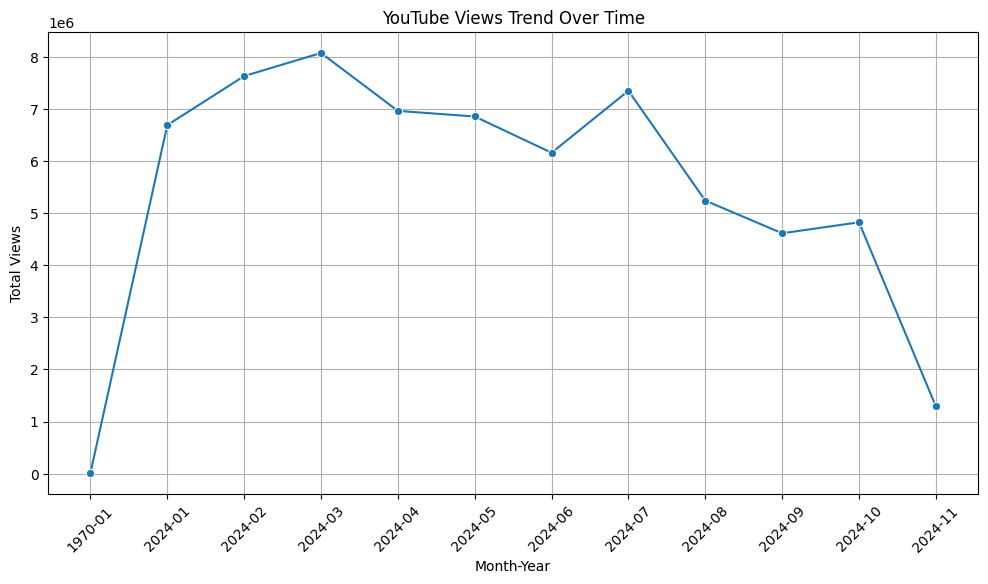

In [92]:
# Extract Year-Month for trend analysis
views_df['Month_Year'] = views_df['Date of View'].dt.to_period('M')

# Aggregate monthly views
monthly_views = views_df.groupby('Month_Year')['YouTube Views'].sum().reset_index()

# Convert Period to String for plotting
monthly_views['Month_Year'] = monthly_views['Month_Year'].astype(str)

# Line Plot: Monthly Performance
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_views, x='Month_Year', y='YouTube Views', marker='o')
plt.xticks(rotation=45)
plt.title('YouTube Views Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Views')
plt.grid()
plt.show()

In [93]:
views_df["month"] = pd.to_datetime(views_df["Date of View"]).dt.to_period("M")
monthly_trend = views_df.groupby("month")["13-34 Year Old Views"].sum().reset_index()

In [94]:
# Convert period to string for plotting
monthly_trend["month"] = monthly_trend["month"].astype(str)

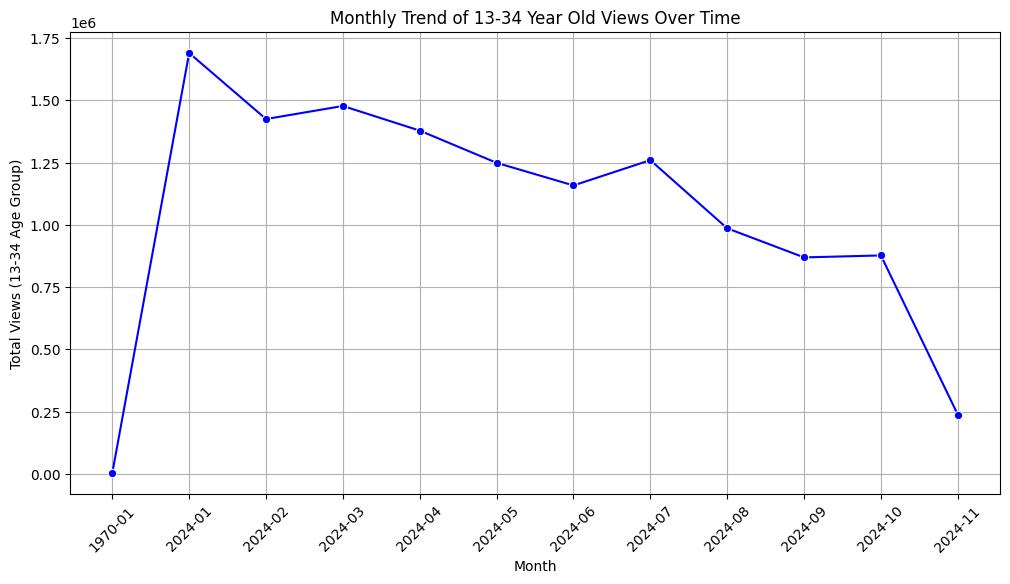

In [95]:
# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x="month", y="13-34 Year Old Views", marker="o", color="b")
plt.title("Monthly Trend of 13-34 Year Old Views Over Time")
plt.xlabel("Month")
plt.ylabel("Total Views (13-34 Age Group)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Predictive Model

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [97]:
# Convert 'Date of View' to datetime
views_df['Date of View'] = pd.to_datetime(views_df['Date of View'], format='%d/%m/%Y')

# Extract relevant features from the date
views_df['Year'] = views_df['Date of View'].dt.year
views_df['Month'] = views_df['Date of View'].dt.month
views_df['Day'] = views_df['Date of View'].dt.day
views_df['DayOfWeek'] = views_df['Date of View'].dt.dayofweek

In [98]:
views_df.head()

,YouTube Views,Date of View,Channel Key,Video ID,13-34 Year Old Views,Month_Year,month,Year,Month,Day,DayOfWeek
0,0,2024-02-08,16,252663,0,2024-02,2024-02,2024,2,8,3
1,0,2024-09-22,16,243030,0,2024-09,2024-09,2024,9,22,6
2,0,2024-09-23,16,243030,0,2024-09,2024-09,2024,9,23,0
3,0,2024-10-28,16,243030,0,2024-10,2024-10,2024,10,28,0
4,0,2024-01-06,16,243030,0,2024-01,2024-01,2024,1,6,5


In [99]:
# Define features and target variable
X = views_df.drop(['YouTube Views'], axis=1)
y = views_df['YouTube Views']

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [102]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [103]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [104]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 78.68195312127804
R-squared: 0.7838729986343091


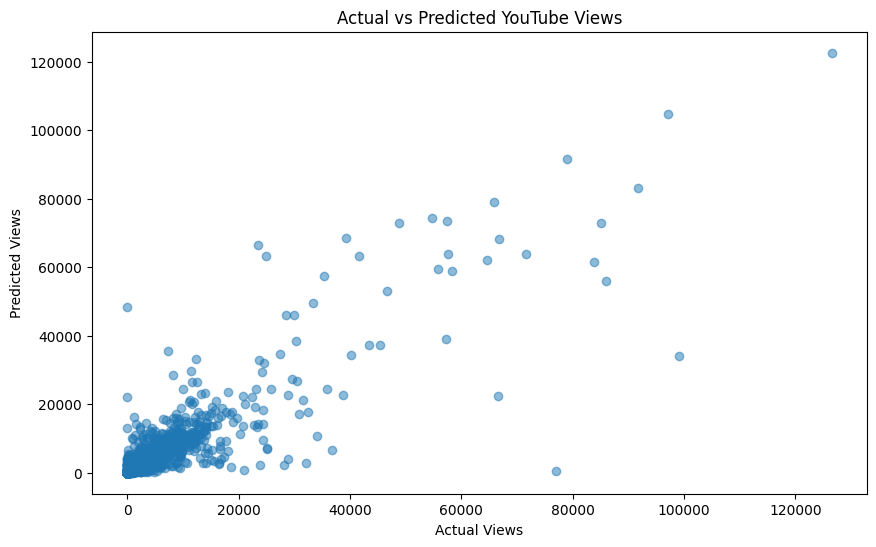

In [105]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Views')
plt.ylabel('Predicted Views')
plt.title('Actual vs Predicted YouTube Views')
plt.show()

In [106]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3  13-34 Year Old Views    0.699285
2              Video ID    0.133141
0          Date of View    0.102680
8                   Day    0.033953
9             DayOfWeek    0.023674
7                 Month    0.007232
6                  Year    0.000035
1           Channel Key    0.000000
4            Month_Year    0.000000
5                 month    0.000000
